In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
data_path = '../../new_5year_update_result/'
pf_info_path = '../../Space_Figure_and_Array/pf_info/pf_info.csv'
data_fname = os.listdir(data_path)

In [3]:
# 绘图库
import pandas as pd
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
import numpy as np
# import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %matplotlib inline
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader
import matplotlib.ticker as mticker
from matplotlib import font_manager
from matplotlib.colors import TwoSlopeNorm

In [4]:
# 读取电站基础信息和地表特征信息
# 0-2 为albedo和VI
# 3-6为LST
# LST使用绝对变化量
# select_col =  list(range(0,14))
# select_col.insert(0,1)
# select_col.insert(0,0)
# print(select_col)
# albedo和VI 使用变化率
select_col =  list(range(14,27))
select_col.insert(0,1)
select_col.insert(0,0)
print(select_col)
pf_data = pd.read_csv(data_path+data_fname[4],usecols=select_col,index_col=['pf_id'])
pf_info = pd.read_csv(pf_info_path,index_col=['pf_id'])
# 聚合
pf_join = pf_data.join(pf_info, on='pf_id')

[0, 1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [5]:
pf_join.head()

,year_mean_diff,year_diff_rate,01df_rate,02df_rate,03df_rate,04df_rate,05df_rate,06df_rate,07df_rate,08df_rate,...,MWac,Ha.,lat,lon,abs_lat,LC_merged,mean_dem,TC_pre_mean,TC_Temp,mean_Solar_radiation
pf_id,,,,,,,,,,,,,,,,,,,,,
Pc66645,-6.026339,-0.042701,-0.079047,-0.040144,-0.050889,0.021030,-0.025238,-0.084274,-0.042550,-0.052860,...,190.0,504.6,42.3975,11.5903,42.3975,croplands,54.344828,40.468571,16.115395,13494810.96
Pm63510,4.908665,0.035150,0.125154,0.017065,0.085730,-0.109622,0.036137,0.062496,0.037041,0.049368,...,150.0,566.3,37.2280,-3.0700,37.2280,grass,1094.654701,37.188548,14.179095,16083232.56
Pm70419,1.013290,0.007128,0.012361,-0.067451,0.019271,-0.045396,-0.006886,0.037444,-0.014443,0.016975,...,100.0,547.5,37.6480,-5.2540,37.6480,croplands,136.092498,43.083333,18.093333,15101112.10
Pj60958,0.501787,0.003759,-0.013818,0.024976,0.203459,-0.069801,-0.033398,-0.027807,-0.087567,0.101929,...,164.0,459.4,36.4000,95.1430,36.4000,Barren,2845.106990,4.650471,5.561130,14347838.05
Pm60967,-1.700412,-0.012221,-0.035916,0.179312,-0.102311,-0.027600,-0.054026,-0.002337,0.032122,-0.010979,...,265.5,528.4,35.3273,-119.9054,35.3273,grass,604.696019,27.644606,15.582461,16657367.95


## 东亚

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


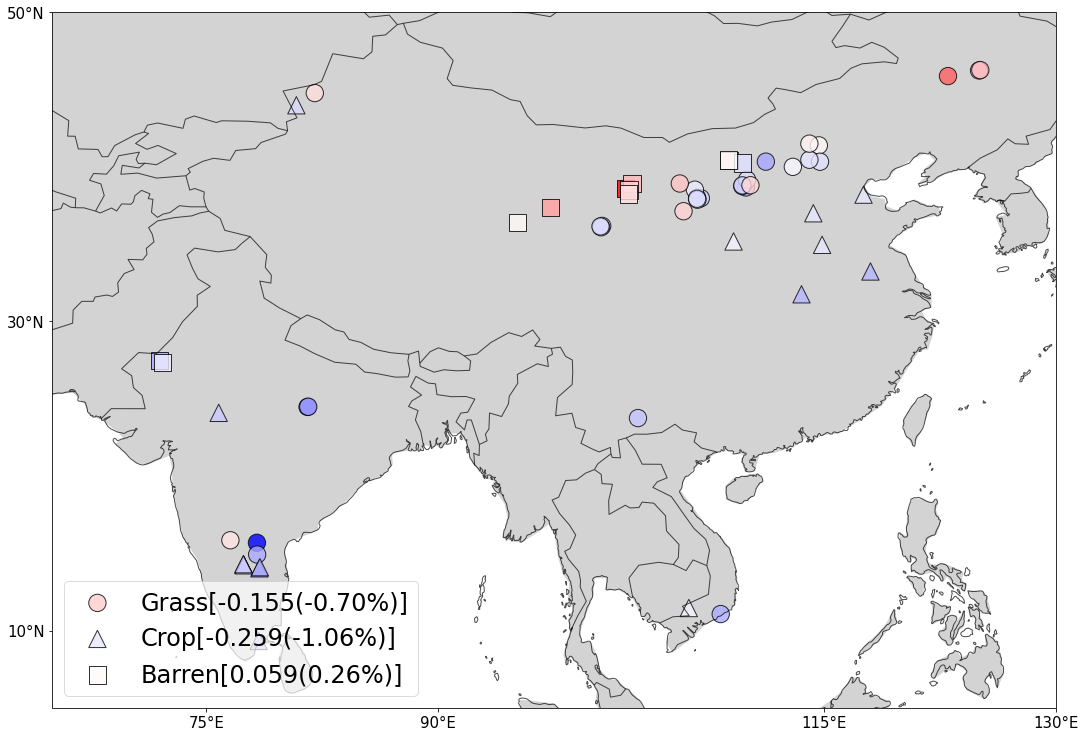

In [6]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((65,130,5,50),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([75,90,115,130], crs=ccrs.PlateCarree())
ax.set_xticklabels([75,90,115,130],fontsize=15)
ax.set_yticks([10,30,50], crs=ccrs.PlateCarree())
ax.set_yticklabels([10,30,50],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.02
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<130)&(pf_join['lon']>65) & (pf_join['lat']>5) & (pf_join['lat']<50)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[grass].year_diff_rate.median()*12))+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[crop].year_diff_rate.median()*12))+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[barren].year_diff_rate.median()*12))+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.02,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.02,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.02,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 澳洲

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


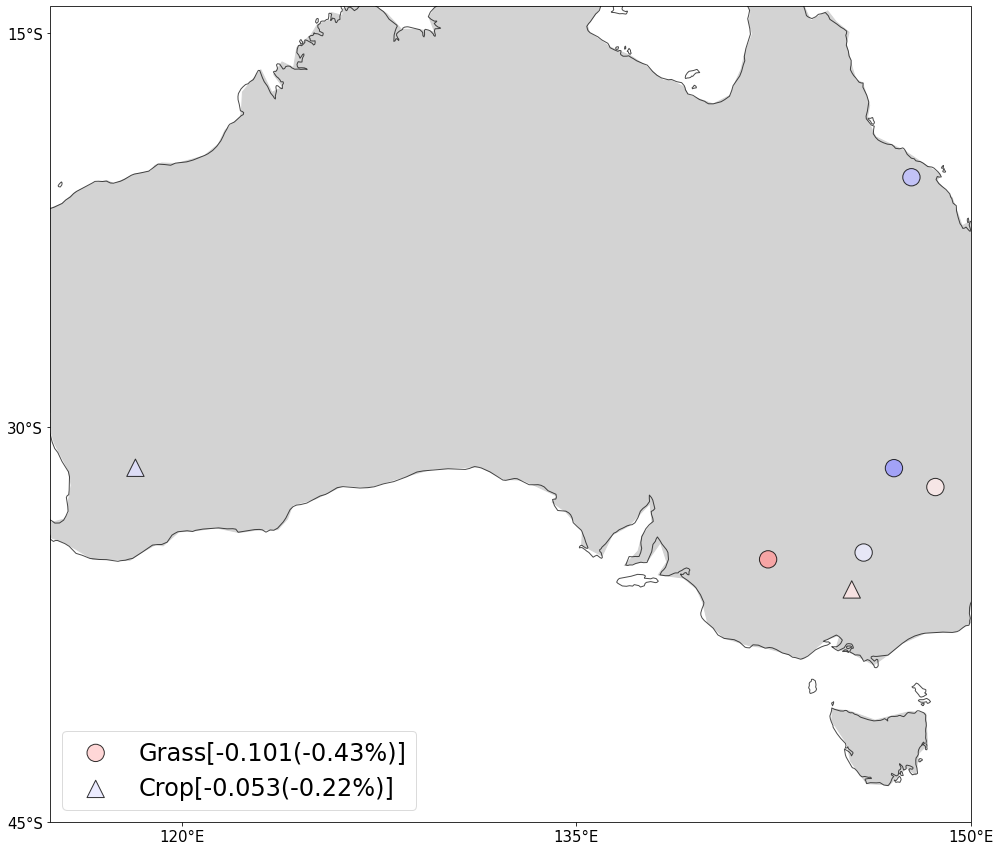

In [7]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((115,150,-14,-45),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([120,135,150], crs=ccrs.PlateCarree())
ax.set_xticklabels([120,135,150],fontsize=15)
ax.set_yticks([-15,-30,-45], crs=ccrs.PlateCarree())
ax.set_yticklabels([-15,-30,-45],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.02
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<150)&(pf_join['lon']>115) & (pf_join['lat']>-45) & (pf_join['lat']<-15)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[grass].year_diff_rate.median()*12))+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[crop].year_diff_rate.median()*12))+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[barren].year_diff_rate.median()*12))+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.02,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.02,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
# plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.02,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 欧洲

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


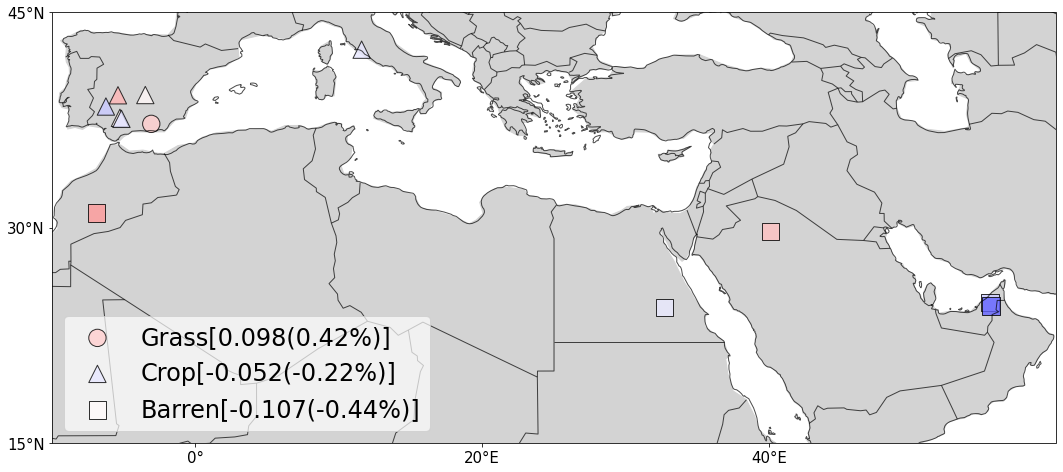

In [8]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-10,60,15,45),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([0,20,40], crs=ccrs.PlateCarree())
ax.set_xticklabels([0,20,40],fontsize=15)
ax.set_yticks([15,30,45], crs=ccrs.PlateCarree())
ax.set_yticklabels([15,30,45],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.02
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<60)&(pf_join['lon']>-10) & (pf_join['lat']>15) & (pf_join['lat']<45)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[grass].year_diff_rate.median()*12))+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[crop].year_diff_rate.median()*12))+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[barren].year_diff_rate.median()*12))+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.02,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.02,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.02,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 北美

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


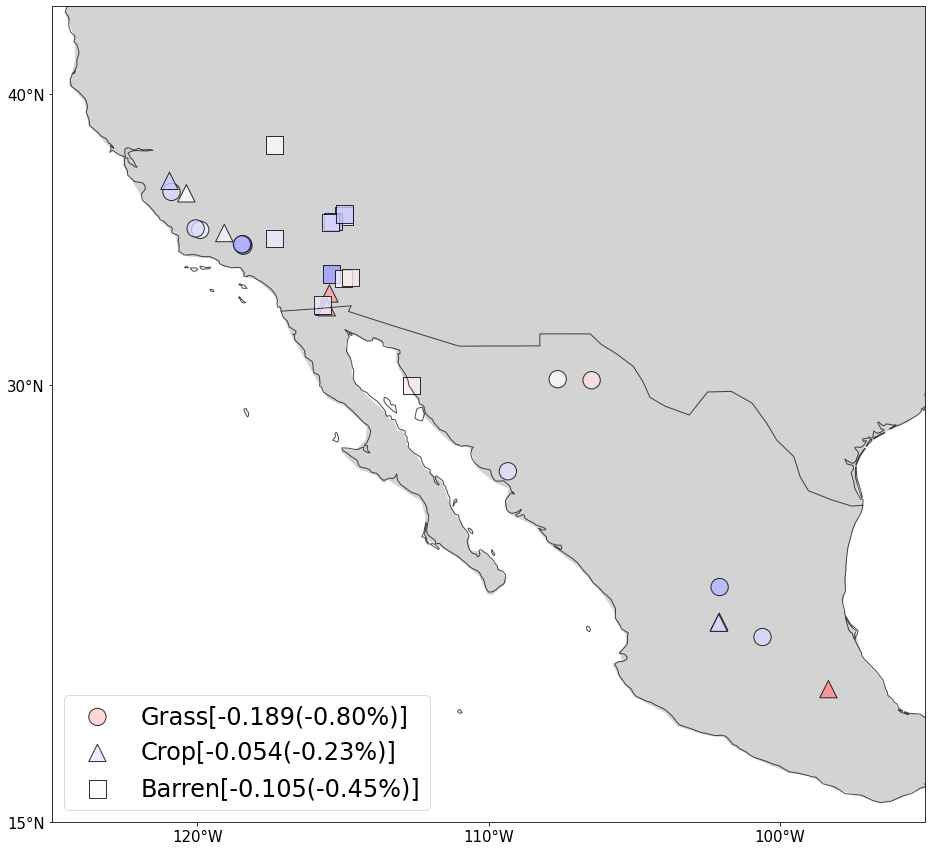

In [9]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-125,-95,15,43),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([-120,-110,-100], crs=ccrs.PlateCarree())
ax.set_xticklabels([-120,-110,-100],fontsize=15)
ax.set_yticks([15,30,40], crs=ccrs.PlateCarree())
ax.set_yticklabels([15,30,40],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.02
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<-95)&(pf_join['lon']>-125) & (pf_join['lat']>15) & (pf_join['lat']<43)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[grass].year_diff_rate.median()*12))+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[crop].year_diff_rate.median()*12))+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[barren].year_diff_rate.median()*12))+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.02,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.02,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.02,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 南美

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


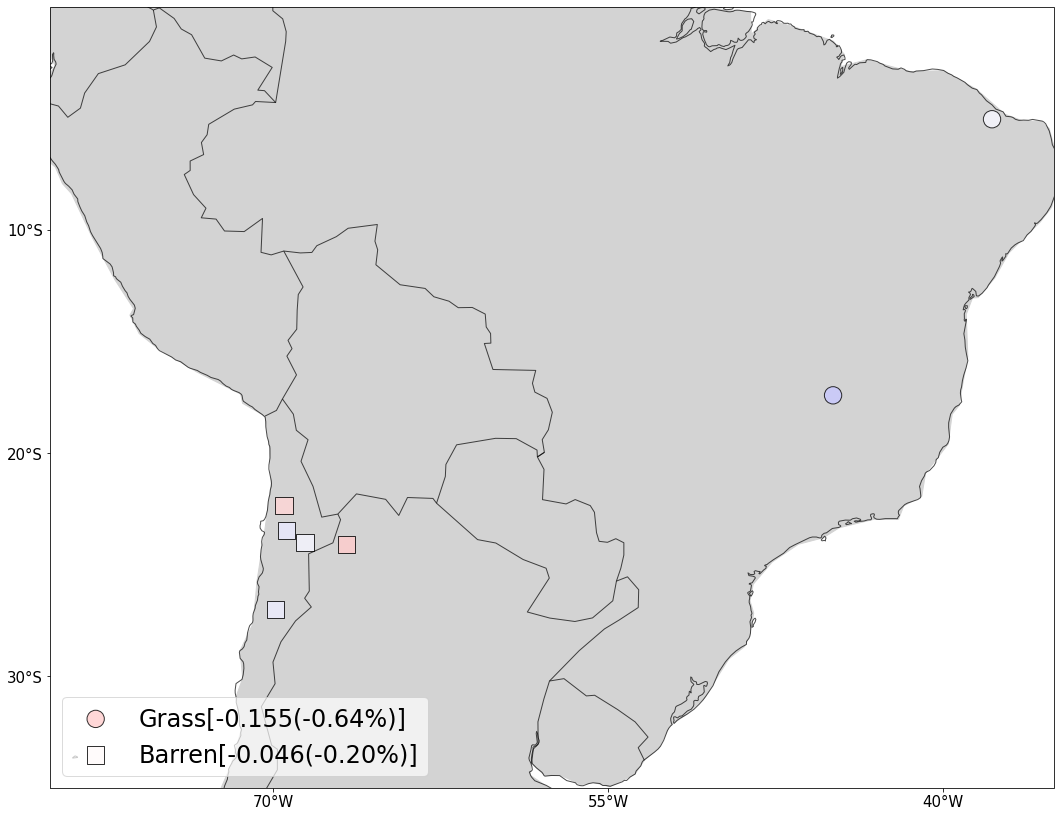

In [10]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-80,-35,0,-35),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([-70,-55,-40], crs=ccrs.PlateCarree())
ax.set_xticklabels([-70,-55,-40],fontsize=15)
ax.set_yticks([-10,-20,-30], crs=ccrs.PlateCarree())
ax.set_yticklabels([-10,-20,-30],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.02
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<-35)&(pf_join['lon']>-80) & (pf_join['lat']>-35) & (pf_join['lat']<0)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[grass].year_diff_rate.median()*12))+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[crop].year_diff_rate.median()*12))+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[barren].year_diff_rate.median()*12))+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.02,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
# plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.02,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.02,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


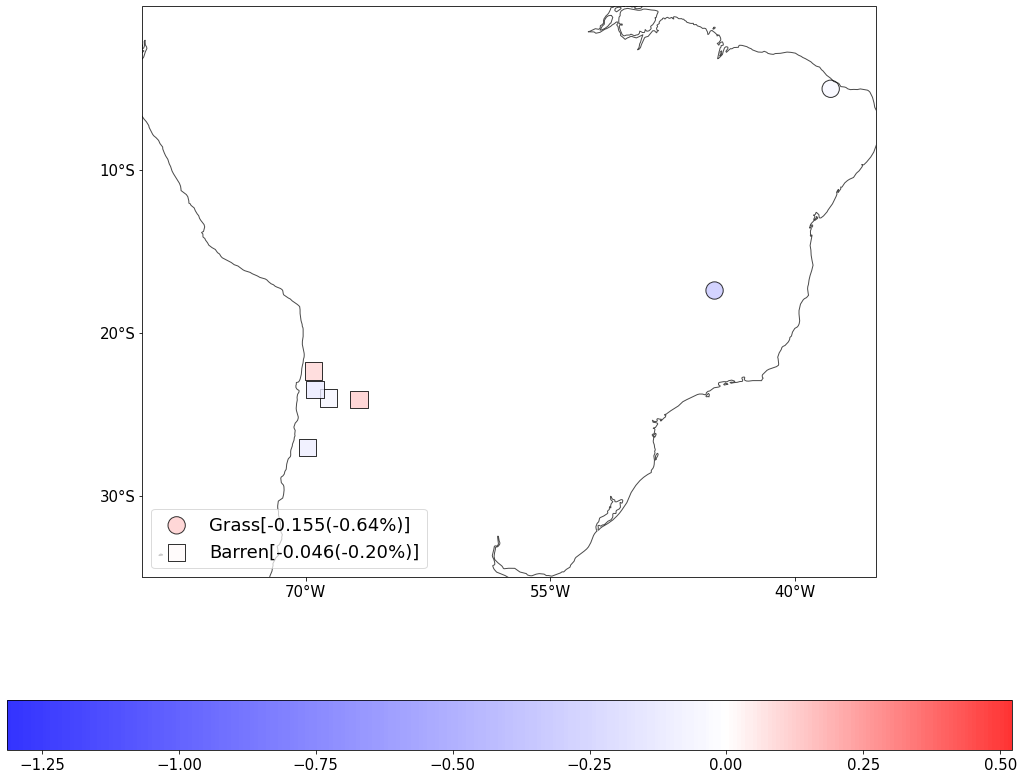

In [12]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-80,-35,0,-35),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([-70,-55,-40], crs=ccrs.PlateCarree())
ax.set_xticklabels([-70,-55,-40],fontsize=15)
ax.set_yticks([-10,-20,-30], crs=ccrs.PlateCarree())
ax.set_yticklabels([-10,-20,-30],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
# ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='w')
# ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.02
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<-35)&(pf_join['lon']>-80) & (pf_join['lat']>-35) & (pf_join['lat']<0)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[grass].year_diff_rate.median()*12))+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[crop].year_diff_rate.median()*12))+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.02), ('%.2f'%(EA_sample[barren].year_diff_rate.median()*12))+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.02,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
# plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.02,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.02,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=18,frameon=True,framealpha = 0.7)
# position=plt.axes([0.35, 0.45, 0.4, 0.02])#位置[左,下,右,上]
cb = plt.colorbar( orientation='horizontal')#方向
cb.ax.tick_params(labelsize=15)
plt.show()

In [ ]:
(EA_sample[grass].year_diff_rate.median()*12)*12)